In [1]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.15.0


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling

In [3]:
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import tensorflow_addons as tfa
from tensorflow_addons.optimizers import AdaBelief
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [5]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to your file on Google Drive
file_path = '/content/drive/My Drive/output_file.csv'  # Replace with your file's path

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the data to verify it loaded correctly
print(data.head())

Mounted at /content/drive
   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [6]:
# Rename columns
data.columns = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [7]:
# Step 1: Data Preparation
X = np.array(data.drop(['cardio'], axis=1))  # Features
y = np.array(data['cardio'])  # Target

In [8]:
# Standardizing the data
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [9]:
# Step 2: Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
# Convert target variable into categorical labels
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(56000, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='sigmoid'))  # Final layer for binary classification

model.compile(optimizer=AdaBelief(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to avoid overfitting
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, Y_test),
                    callbacks=[es], verbose=1)


Epoch 1/100
1750/1750 [==============================] - 13s 4ms/step - loss: 0.6367 - accuracy: 0.6378 - val_loss: 0.5755 - val_accuracy: 0.7197
Epoch 2/100
1750/1750 [==============================] - 8s 5ms/step - loss: 0.5925 - accuracy: 0.7056 - val_loss: 0.5634 - val_accuracy: 0.7299
Epoch 3/100
1750/1750 [==============================] - 6s 4ms/step - loss: 0.5802 - accuracy: 0.7150 - val_loss: 0.5534 - val_accuracy: 0.7331
Epoch 4/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.5738 - accuracy: 0.7180 - val_loss: 0.5484 - val_accuracy: 0.7389
Epoch 5/100
1750/1750 [==============================] - 14s 8ms/step - loss: 0.5720 - accuracy: 0.7203 - val_loss: 0.5485 - val_accuracy: 0.7360
Epoch 6/100
1750/1750 [==============================] - 6s 4ms/step - loss: 0.5700 - accuracy: 0.7214 - val_loss: 0.5512 - val_accuracy: 0.7341
Epoch 7/100
1750/1750 [==============================] - 8s 5ms/step - loss: 0.5722 - accuracy: 0.7205 - val_loss: 0.5472 - val

In [13]:
# Get predictions and evaluate the model
categorical_pred = np.argmax(model.predict(X_test), axis=1)
y_test_int = np.argmax(Y_test, axis=1)

# Print results
print('Results for Categorical Model')
print(f"Accuracy: {accuracy_score(y_test_int, categorical_pred)}")
print(classification_report(y_test_int, categorical_pred))

438/438 [==============================] - 1s 2ms/step
Results for Categorical Model
Accuracy: 0.7325
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      6988
           1       0.73      0.74      0.74      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



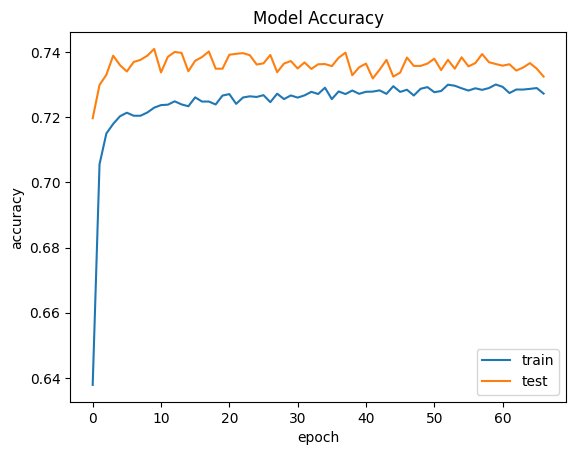

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

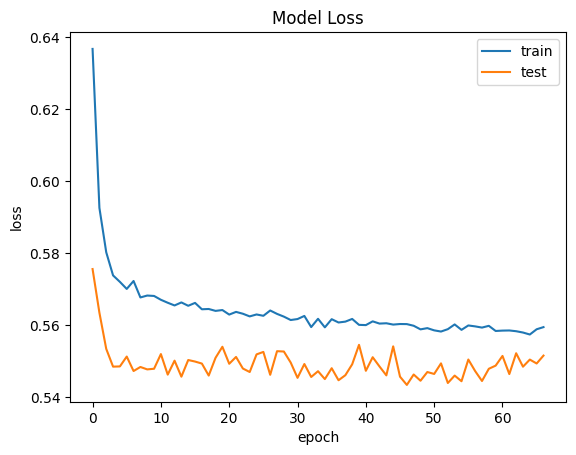

In [15]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()